!pip install xgboost
!pip install scikit-learn

In [2]:
from datetime import datetime 

In [3]:
import   pandas                   as        pd
import   numpy                    as        np
import   matplotlib.pyplot        as        plt
import   sklearn.metrics          as        metrics

In [4]:
from    sklearn.svm               import    SVC
from    sklearn.ensemble          import    RandomForestClassifier, AdaBoostClassifier 
from    sklearn.model_selection   import    StratifiedKFold
from    sklearn.model_selection   import    StratifiedGroupKFold
from    sklearn.model_selection   import    RandomizedSearchCV
from    sklearn.linear_model      import    LogisticRegression
from    sklearn.tree              import    DecisionTreeClassifier
from    sklearn.neighbors         import    KNeighborsClassifier
from    sklearn.naive_bayes       import    GaussianNB   
from    xgboost                   import    XGBClassifier  
from    sklearn.metrics           import    make_scorer, precision_score, recall_score, f1_score
from    sklearn.metrics           import    confusion_matrix, classification_report
from    sklearn.model_selection   import    train_test_split,cross_val_score,cross_val_predict 

In [5]:
def evaluate_model_performance(name, model, x_train, y_train, x_test, y_test):
    from sklearn.metrics import recall_score, precision_score,roc_auc_score,f1_score  
    # Predict the response for training dataset
    classifier         =  model.fit(x_train, y_train)
    # print the model parameters
    print("Model parameters: {}".format(model.get_params()))
    predicted_train    =  classifier.predict(x_train)
    matrix             =  confusion_matrix(y_train, predicted_train)
    ###
    train_auroc        =  roc_auc_score(y_train, predicted_train)
    train_recall       =  recall_score(y_train, predicted_train)
    train_precision    =  precision_score(y_train, predicted_train)
    train_f1score      =  f1_score(y_train, predicted_train, average = 'weighted')
    ###
    print("\nTraining Data")
    print(matrix)
    draw_cm(y_train, predicted_train)
    measures_train      = classification_report(y_train, predicted_train) 
    print("\nTraining Data")
    print(measures_train) 
    draw_roc(y_train, predicted_train)
    # Predict the response for testing dataset
    predicted_test     =  classifier.predict(x_test)
    matrix1            =  confusion_matrix(y_test, predicted_test)
    ### 
    test_auroc         =  roc_auc_score(y_test, predicted_test)
    test_recall        =  recall_score(y_test, predicted_test)
    test_precision     =  precision_score(y_test, predicted_test)
    test_f1score       =  f1_score(y_test, predicted_test, average = 'weighted')
    ###    
    print("\nTest  Data")
    print(matrix1)
    draw_cm(y_test, predicted_test)
    measures_test     = classification_report(y_test, predicted_test) 
    print("\nTest  Data")
    print(measures_test) 
    draw_roc(y_test, predicted_test) 
    df_metrics    =  pd.DataFrame({'Model' : name, 'Recall Training data' : train_recall, 'Recall Test data' : test_recall,\
                              'F1 Weighted Training data' : train_f1score, 'F1 Weighted Test data' : test_f1score,
                              'AUROC Training data' : train_auroc, 'AUROC Test data' : test_auroc,
                              'Precision Training data' : train_precision, 'Precision Test data' : test_precision},\
                              index = [0]) 
    return df_metrics

In [6]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [7]:
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [8]:
start_time   =  datetime.now()

In [9]:
model_names  =  ["LR","KNN","CART","NB","RF","XGBoost","AdaBoost"]
models       =  [LogisticRegression(max_iter = 3000),\
                 KNeighborsClassifier(),\
                 DecisionTreeClassifier(),\
                 GaussianNB(),\
                 RandomForestClassifier(),\
                 XGBClassifier(),\
                 AdaBoostClassifier()]

In [10]:
X_            =   pd.read_csv(r'E:\DSE-FT-C-May24-G5\Data\Processed_data_X_2024-11-19 12-25-04.csv')
y             =   pd.read_csv(r'E:\DSE-FT-C-May24-G5\Data\Processed_data_y_2024-11-19 12-25-04.csv')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, shuffle = True, stratify = y, random_state = 100)

i = 0 Model = LR
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 3000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Data
[[6361    9]
 [   4 1626]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


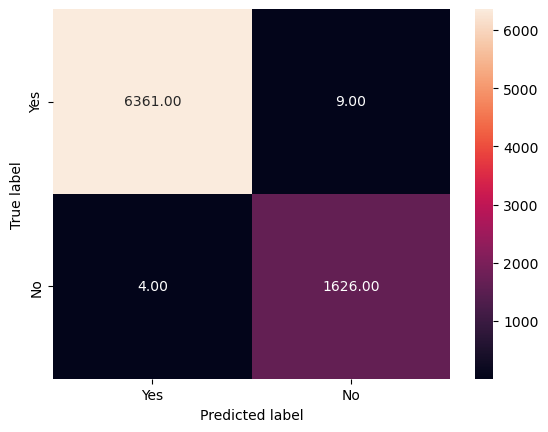


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



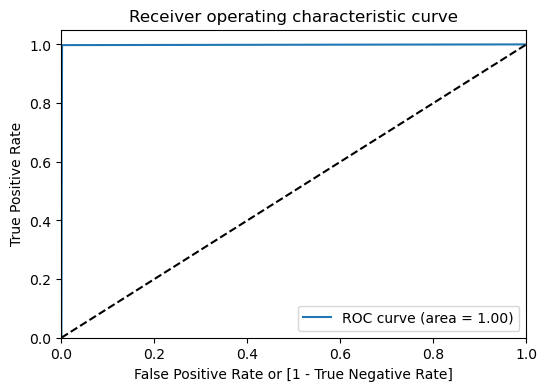


Test  Data
[[1591    1]
 [   0  408]]


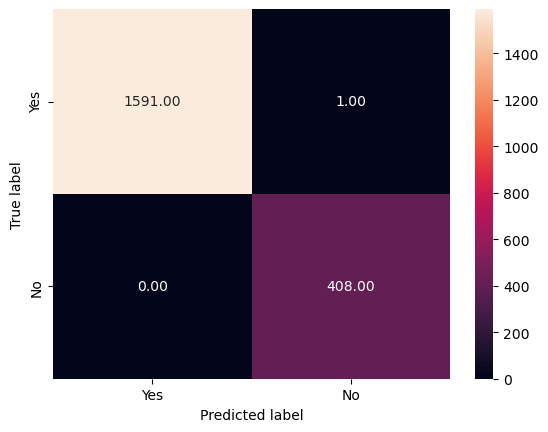


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



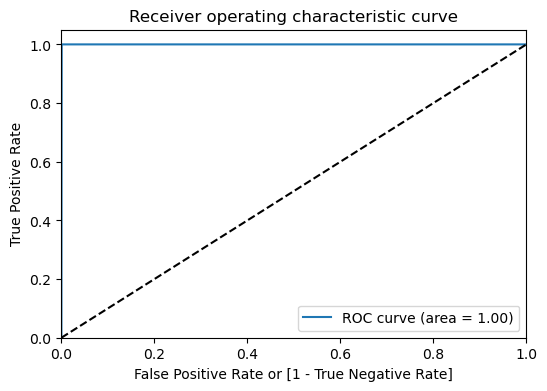

i = 1 Model = KNN
Model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Training Data
[[6361    9]
 [   4 1626]]


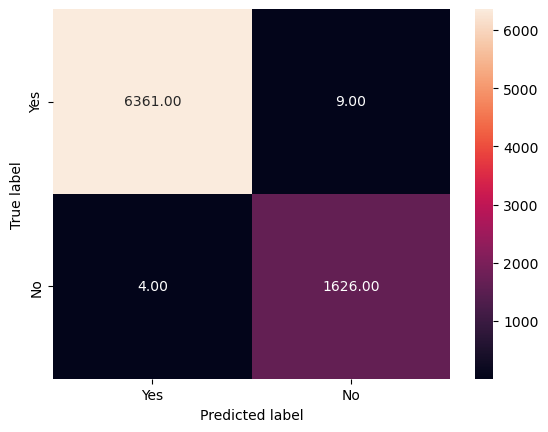


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



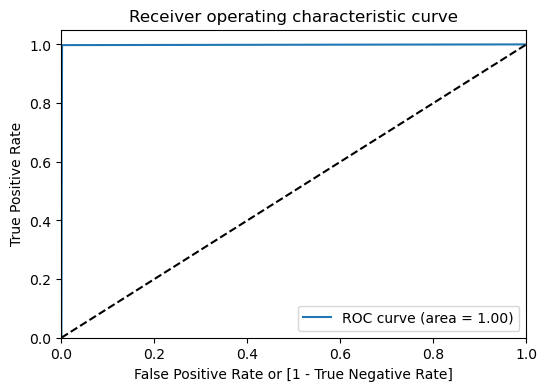


Test  Data
[[1591    1]
 [   0  408]]


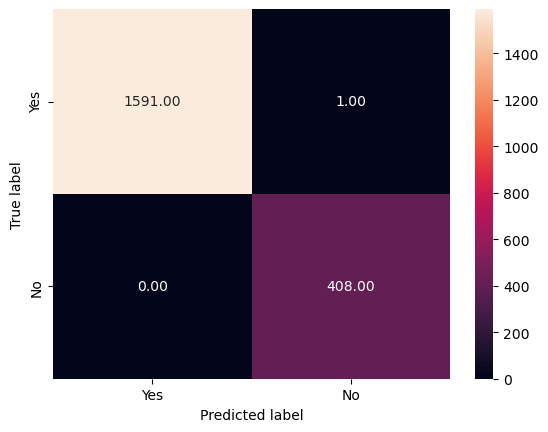


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



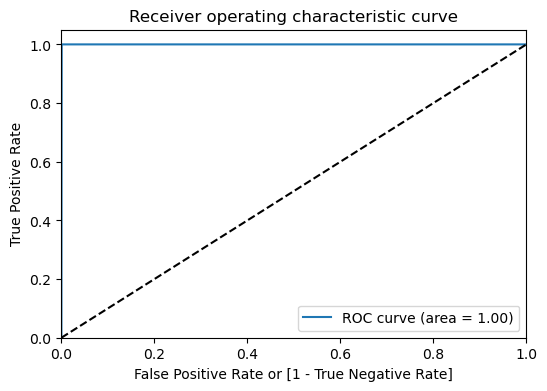

i = 2 Model = CART
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Training Data
[[6370    0]
 [   0 1630]]


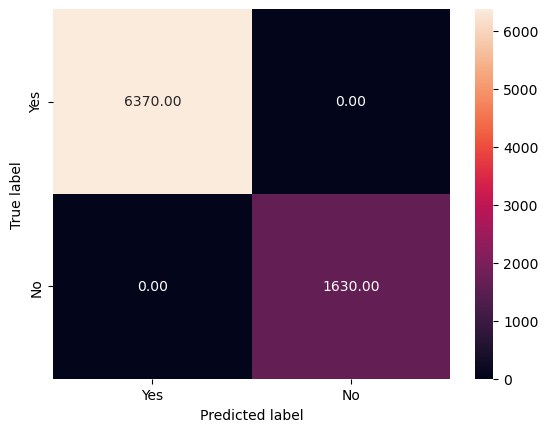


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



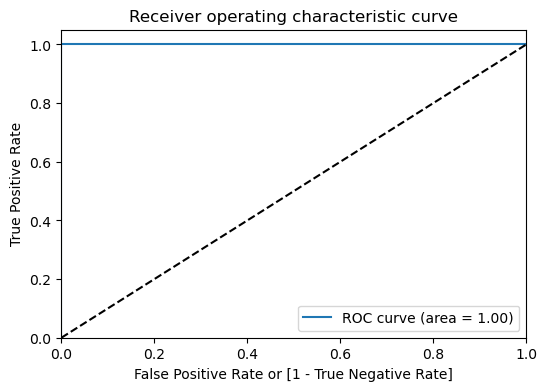


Test  Data
[[1590    2]
 [   4  404]]


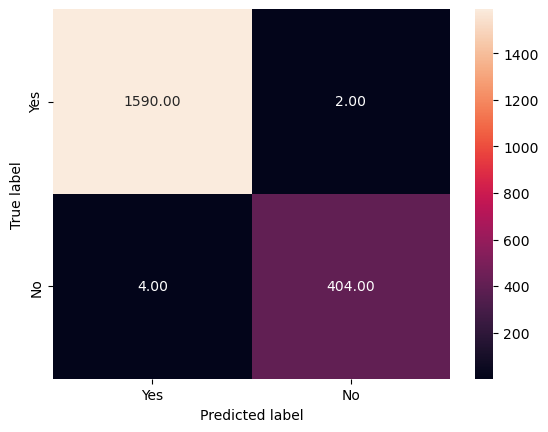


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      0.99      0.99       408

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



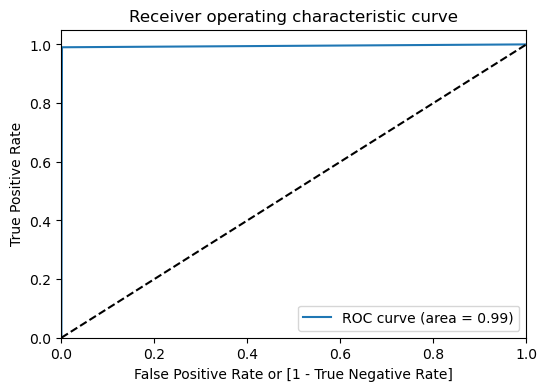

i = 3 Model = NB
Model parameters: {'priors': None, 'var_smoothing': 1e-09}

Training Data
[[6361    9]
 [   4 1626]]


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


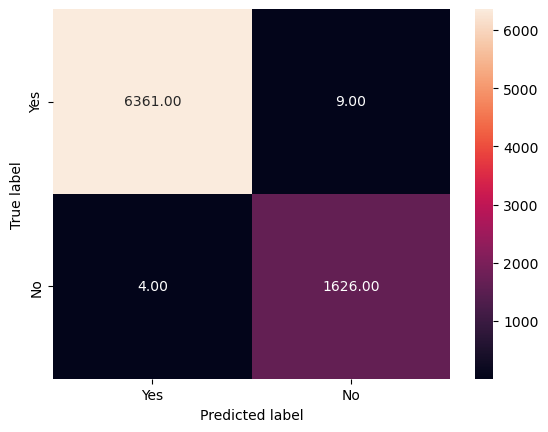


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



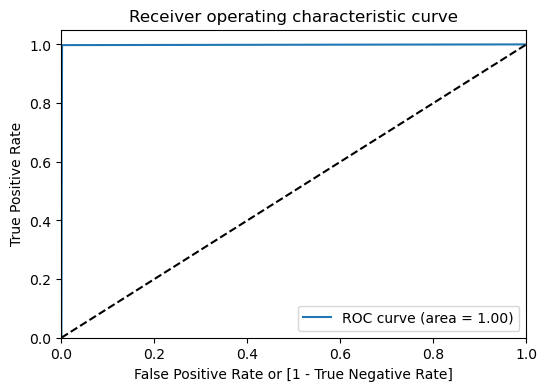


Test  Data
[[1591    1]
 [   0  408]]


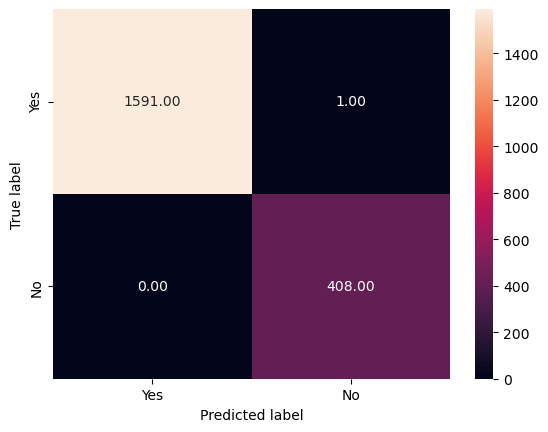


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



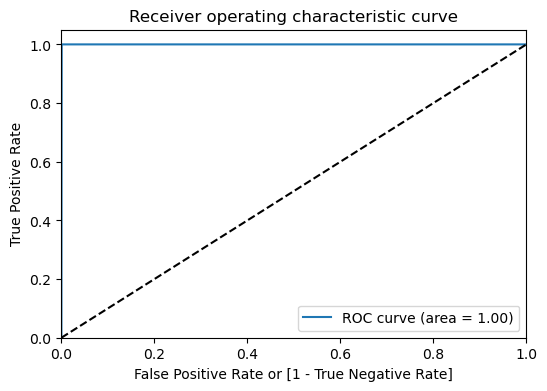

i = 4 Model = RF


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Training Data
[[6370    0]
 [   0 1630]]


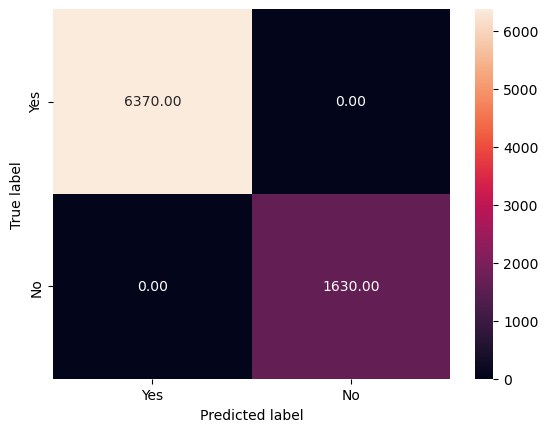


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



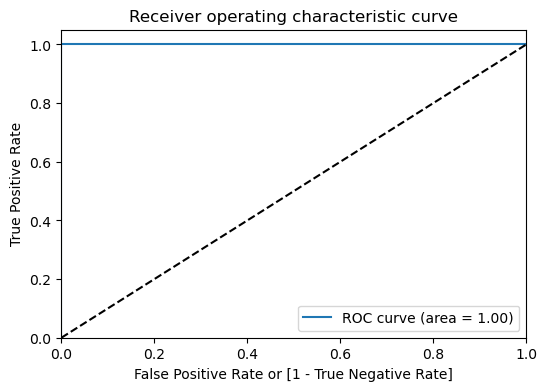


Test  Data
[[1591    1]
 [   0  408]]


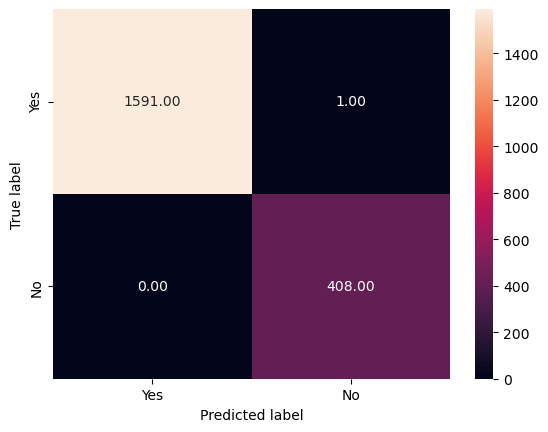


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



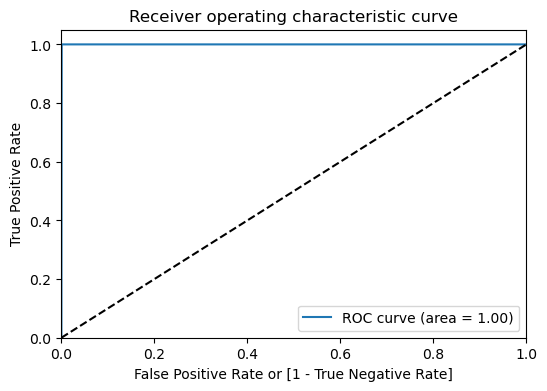

i = 5 Model = XGBoost
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Training Data
[[6369    1]
 [   2 1628]]


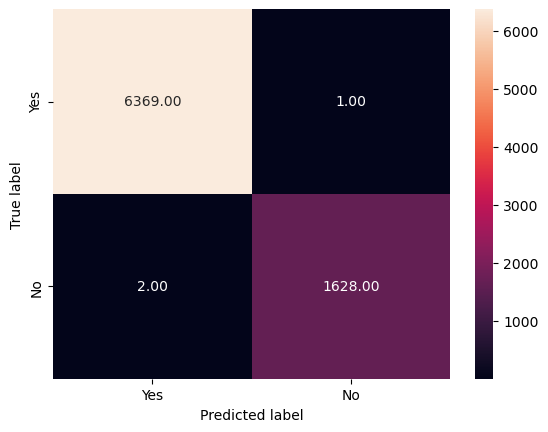


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



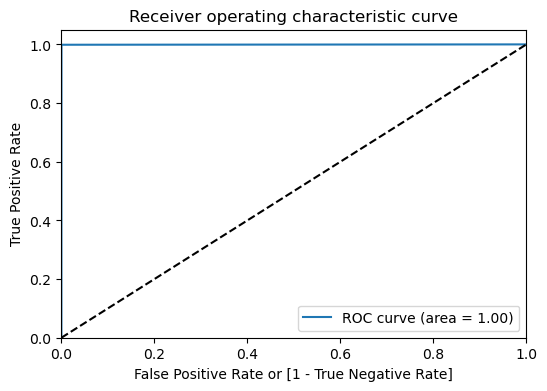


Test  Data
[[1591    1]
 [   1  407]]


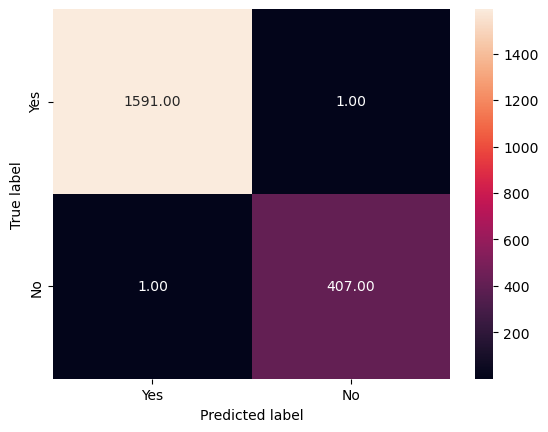


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



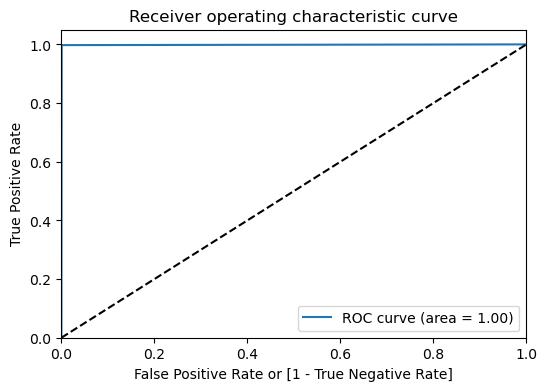

i = 6 Model = AdaBoost


C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PVS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model parameters: {'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

Training Data
[[6361    9]
 [   4 1626]]


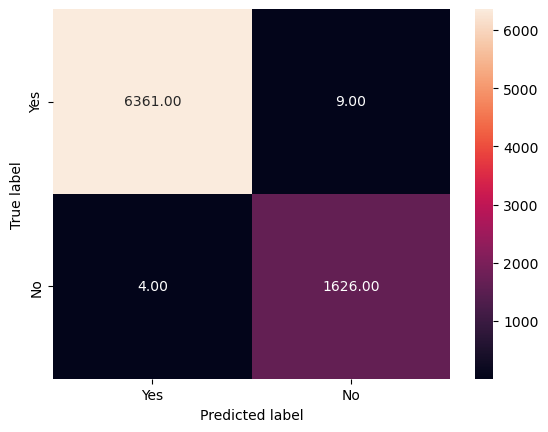


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



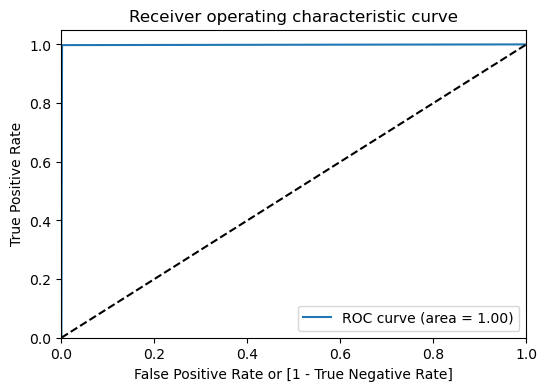


Test  Data
[[1591    1]
 [   0  408]]


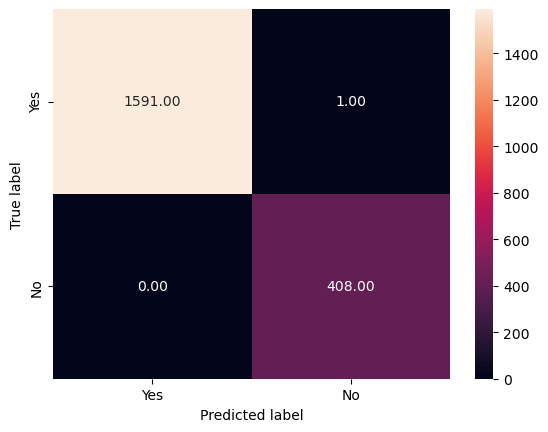


Test  Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



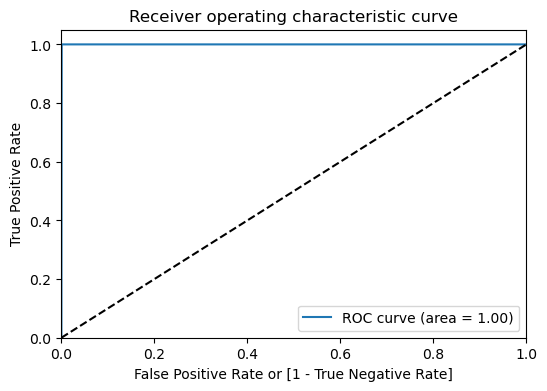

In [12]:
metrics_df    =  pd.DataFrame()
for   i    in   range(len(model_names)):
      model_x            =   model_names[i]
      print("i = %d Model = %s" %(i,model_x))
      classifier         =   models[i] 
      mp_df         =  evaluate_model_performance(model_x, classifier, X_train, y_train, X_test, y_test)
      metrics_df    =  pd.concat([metrics_df, mp_df])

In [13]:
metrics_df.sort_values(by=['Recall Test data'], ascending = False)

,Model,Recall Training data,Recall Test data,F1 Weighted Training data,F1 Weighted Test data,AUROC Training data,AUROC Test data,Precision Training data,Precision Test data
0,LR,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,KNN,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,NB,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,RF,1.000000,1.000000,1.000000,0.999500,1.000000,0.999686,1.000000,0.997555
0,AdaBoost,0.997546,1.000000,0.998376,0.999500,0.998067,0.999686,0.994495,0.997555
0,XGBoost,0.998773,0.997549,0.999625,0.999000,0.999308,0.998460,0.999386,0.997549
0,CART,1.000000,0.990196,1.000000,0.996997,1.000000,0.994470,1.000000,0.995074


In [14]:
time_elapsed = datetime.now() - start_time
print('\nExecution Time for evaluating the performance of 7 models on Raw data not treated for data imbalance')
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


Execution Time for evaluating the performance of 7 models on Raw data not treated for data imbalance
Time elapsed (hh:mm:ss.ms) 0:00:06.415319
